[11.49765762 11.86632473 12.74738538 12.90567251 12.67891306 10.96550021
 12.55351696 12.59177222 12.87389189 10.26515601 10.34612714 11.62035923
 12.79960501 11.0615501  10.2279771  10.84754932 11.80604333 10.94603414
 11.68632957 10.88847673]


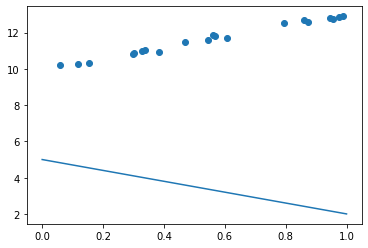

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋을 적당히 생성
# 1차원 입력 (bias를 포함 = 2차원) -> 1차원 출력

# 샘플의 개수
N = 20
x = np.random.rand(N) # (N, ) 벡터
y = 10 + 3*x + 1e-1*np.random.randn(N)

# design matrix X = (N, D)
# sample: N, dimension: D
X = np.hstack([np.ones( (N,1) ), x.reshape(N,1)])
# print(X)
print(y)
# 전체 입력에 대해서 -> 예측을 구해서 plot
theta = np.array([5, -3])
X_plot = np.hstack([np.ones((5, 1)), np.linspace(0, 1, 5).reshape(5,1)])
y_plot = X_plot.dot(theta)

plt.figure()
plt.scatter(X[:,1], y) # 주어진 학습 데이터를 점으로 찍음
plt.plot(X_plot[:,1], y_plot) # 전체 입력을 잘게 쪼개서, 전체 예측을 구함

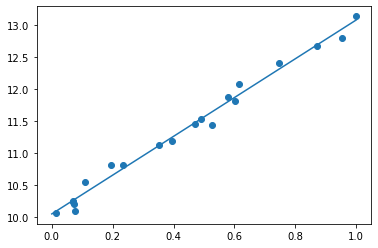

In [23]:
# normal equation
# = closed form으로 해를 구함
# 1. theta <- 주어진 데이터(X, y)로 구함
# 2. 구한 theta에 대해서 예측을 수행
# 3. 그 예측에 대해서 SSE를 계산
# 4. 현재 예측한 theta를 가지고 plot을 해봄

# 1. theta <- 주어진 데이터(X, y)로 구함
theta = np.linalg.inv( X.T.dot(X) ).dot(X.T.dot(y))   
#linag => linag안에 inv가 있음

# 2. 구한 theta에 대해서 예측을 수행
# 학습 데이터에 들어있는 정답 출력 = y
# (실제 입력 X) x (방금 구한 theta) = y_predict
y_predict = X.dot(theta)

# 3. 그 예측에 대해서 SSE를 계산
# SSE cost = sum [ (정답 y) - (예측 y_predict) ]^2
SSE = np.sum( (y - y_predict)**2 )

# 4. 현재 예측한 theta를 가지고 plot을 해봄
y_plot = X_plot.dot(theta)

plt.figure()
plt.scatter(X[:,1], y) # 주어진 학습 데이터를 점으로 찍음
plt.plot(X_plot[:,1], y_plot) # 전체 입력을 잘게 쪼개서, 전체 예측을 구함

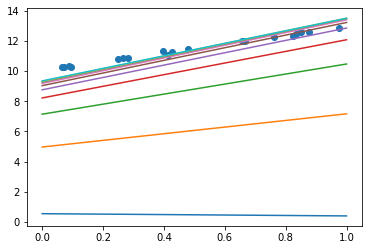

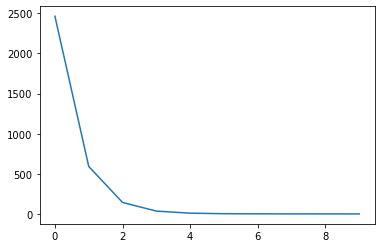

In [60]:
# batch gradient descent
# theta <- 랜덤으로 하나 뽑아서 초기화
# epoch을 반복
## y_predict <= theta, X
## gradient  <= y_predict, y, X <= 2* X.T (y_predict - y)
## update    <= theta - eta*gradient

# hyperparameter: learning rate, maximum epoch
eta = 0.01
maxEpoch = 10

# theta를 랜덤으로 초기화 한번
theta = np.random.randn(2)
SSE = []

plt.figure()
plt.scatter(X[:,1], y)
for epoch in range(maxEpoch):
    y_predict = X.dot(theta)
    
    # SSE cost 구하는거 추가
    SSE.append( np.sum( (y - y_predict)**2 ) )
    
    # 예측값 plot하는거 추가
    y_plot = X_plot.dot(theta)
    plt.plot(X_plot[:,1], y_plot)
    
    grad = 2*X.T.dot(y_predict - y)
    theta = theta - eta*grad
    
plt.figure()
plt.plot(SSE)

[1.         0.56175392]


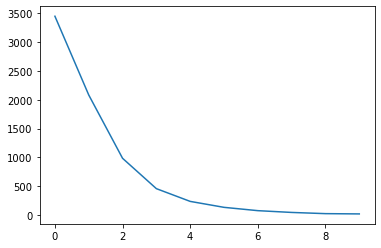

In [7]:
# stochastic gradient descent
# batch gradient      <= 2 * X.^T     * (y_predict - y)
# stochastic gradient <= 2 * X[n,:].T * (y_predict[n] - y[n])

# hyperparameter: learning rate, maximum epoch
eta = 0.1
maxEpoch = 10

# theta를 랜덤으로 초기화 한번
theta = np.random.randn(2)
SSE = []
print(X[1,:].reshape(2))
for epoch in range(maxEpoch):  #여기서는 사실 epoch의 개념은 아니지 ㅇㅇ
    y_predict = X.dot(theta)
    SSE.append(np.sum( (y - y_predict)**2 ))
    
    n = np.random.randint(0, N, 1)
    grad = 2 * X[n,:].reshape(2) * (y_predict[n] - y[n])  
    # reshape(2) => 열벡터(기본)로 만들어주는거
    theta = theta - eta*grad    

plt.figure()
plt.plot(SSE)

In [8]:
N = 20
x1 = np.random.rand(N)
x2 = np.random.rand(N)
x3 = np.random.rand(N)
y = 10 + 3*x1 -5*x2 + 1*x3 + 1e-1*np.random.randn(N)

# 20 x 3
X = np.hstack([np.ones((N,1)), x1.reshape(N,1), x2.reshape(N,1), x3.reshape(N,1)])


# normal equation
theta = np.linalg.inv( X.T.dot(X) ).dot(X.T.dot(y))


# gradient descent
theta = np.random.randn(4)
y_predict = X.dot(theta)
grad = 2*X.T.dot(y_predict - y)
theta = theta - 0.01*grad
SSE = np.sum( (y - y_predict)**2 )
print(SSE)

1791.1574557803906
